In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("../data/raw/Amazon-Products.csv")
data.head()


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [3]:


# Load the Amazon-Products dataset
amazon_products_path = '../data/raw/Amazon-Products.csv'
amazon_products = pd.read_csv(amazon_products_path)

# Load the reviews from the uploaded file
reviews_file_path = '../data/raw/reviews.txt'
with open(reviews_file_path, 'r') as file:
    reviews = file.read().splitlines()

# Generate synthetic user IDs and product IDs
num_users = 1000
num_products = amazon_products.shape[0]

np.random.seed(42)
user_ids = [f'A{str(i).zfill(9)}' for i in np.random.randint(1, num_users + 1, size=num_products)]
product_ids = [f'B{str(i).zfill(9)}' for i in amazon_products.index]

# Assign reviews
product_reviews = np.random.choice(reviews, size=num_products)

# Create a DataFrame to store the sample reviews
sample_reviews = pd.DataFrame({
    'ProductId': product_ids,
    'UserId': user_ids,
    'Review': product_reviews
})

# Merge with the original amazon_products DataFrame for a complete view
amazon_products_with_reviews = amazon_products.copy()
amazon_products_with_reviews['ProductId'] = sample_reviews['ProductId']
amazon_products_with_reviews['UserId'] = sample_reviews['UserId']
amazon_products_with_reviews['Review'] = sample_reviews['Review']

# Display the first few rows of the dataset with reviews
# import ace_tools as tools; tools.display_dataframe_to_user(name="Amazon Products with Reviews", dataframe=amazon_products_with_reviews)


amazon_products_with_reviews

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,ProductId,UserId,Review
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",B000000000,A000000103,"""An excellent purchase, I'm so happy with ..."
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",B000000001,A000000436,"""This product is sensational, it's high-qu..."
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",B000000002,A000000861,"""At first, I was skeptical, but this produ..."
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",B000000003,A000000271,"""Without a doubt, this product is exceptio..."
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",B000000004,A000000107,"""Speechless, this product is high-quality ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599",B000551580,A000000270,"""Truly unbelievable, this product is excep..."
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999",B000551581,A000000247,"""Superb product, high-quality, and works p..."
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999",B000551582,A000000359,"""Great investment, this product is high-qu..."
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN,B000551583,A000000656,"""Definitely a must-have, this product is h..."


In [4]:
amazon_products_with_reviews['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

In [5]:
amazon_products_with_reviews[amazon_products_with_reviews['main_category']=="kids' fashion"]['sub_category'].unique()

array(['Baby Fashion', "Kids' Clothing", "Kids' Fashion", "Kids' Shoes",
       "Kids' Watches", 'School Bags'], dtype=object)

In [6]:
amazon_products_with_reviews.to_csv("../data/processed/amazon_products_with_reviews.csv", index=False)

### Summary

In [7]:
data=pd.read_csv("../data/processed/amazon_products_with_reviews.csv")

In [8]:
data.shape

(551585, 13)

In [9]:
data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price',
       'ProductId', 'UserId', 'Review'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
 10  ProductId       551585 non-null  object
 11  UserId          551585 non-null  object
 12  Review          551585 non-null  object
dtypes: int64(1), object(12)
memory usage: 54.7+ MB


In [15]:
data.dtypes


Unnamed: 0         int64
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
ProductId         object
UserId            object
Review            object
dtype: object

In [16]:
data = data.drop(columns=["Unnamed: 0"])


In [19]:
import pandas as pd

def convert_to_numeric(series):
    series = series.astype(str).str.replace(r"[^\d.]", "", regex=True)
    return pd.to_numeric(series, errors="coerce")


In [20]:
numeric_cols = [
    "ratings",
    "no_of_ratings",
    "discount_price",
    "actual_price"
]

for col in numeric_cols:
    data[col] = convert_to_numeric(data[col])


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            551585 non-null  object 
 1   main_category   551585 non-null  object 
 2   sub_category    551585 non-null  object 
 3   image           551585 non-null  object 
 4   link            551585 non-null  object 
 5   ratings         369582 non-null  float64
 6   no_of_ratings   372495 non-null  float64
 7   discount_price  490422 non-null  float64
 8   actual_price    533772 non-null  float64
 9   ProductId       551585 non-null  object 
 10  UserId          551585 non-null  object 
 11  Review          551585 non-null  object 
dtypes: float64(4), object(8)
memory usage: 50.5+ MB


In [33]:
data.duplicated().sum()

0

In [22]:
data.isnull().sum()


name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           182003
no_of_ratings     179090
discount_price     61163
actual_price       17813
ProductId              0
UserId                 0
Review                 0
dtype: int64

In [23]:
data["ratings"] = data["ratings"].fillna(data["ratings"].median())

data["discount_price"] = data["discount_price"].fillna(
    data["discount_price"].median()
)

data["actual_price"] = data["actual_price"].fillna(
    data["actual_price"].median()
)


In [24]:
data["no_of_ratings"] = data["no_of_ratings"].fillna(0).astype(int)


In [27]:
print(data.isnull().sum())


name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
ProductId         0
UserId            0
Review            0
dtype: int64


In [28]:
data.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
ProductId         0
UserId            0
Review            0
dtype: int64

#### Comparision table


In [29]:
before_quality = {
    "Total Rows": 551585,
    "Missing Values": 182003 + 179090 + 61163 + 17813,
    "Duplicate Rows": data.duplicated().sum(),
    "Incorrect Data Types": 4
}


In [30]:
after_quality = {
    "Total Rows": data.shape[0],
    "Missing Values": data.isnull().sum().sum(),
    "Duplicate Rows": data.duplicated().sum(),
    "Incorrect Data Types": 0
}


In [31]:
import pandas as pd

quality_comparison = pd.DataFrame({
    "Metric": before_quality.keys(),
    "Before Cleaning": before_quality.values(),
    "After Cleaning": after_quality.values()
})

quality_comparison


,Metric,Before Cleaning,After Cleaning
0,Total Rows,551585,551585
1,Missing Values,440069,0
2,Duplicate Rows,0,0
3,Incorrect Data Types,4,0


<Axes: title={'center': 'Data Quality Improvement'}, xlabel='Metric'>

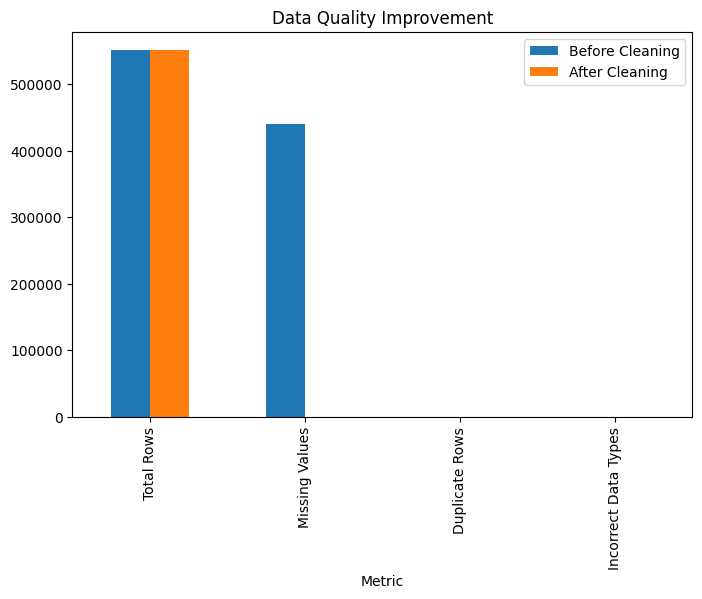

In [32]:
quality_comparison.set_index("Metric").plot(
    kind="bar",
    figsize=(8,5),
    title="Data Quality Improvement"
)


In [38]:
sampled_data = data.sample(
    n=25000,
    random_state=42
).reset_index(drop=True)


In [39]:
# Compare rating distribution
data["ratings"].describe(), sampled_data["ratings"].describe()

# Compare category distribution


(count    551585.000000
 mean          3.858062
 std           0.827460
 min           1.000000
 25%           3.700000
 50%           3.900000
 75%           4.100000
 max         100.000000
 Name: ratings, dtype: float64,
 count    25000.000000
 mean         3.866340
 std          0.722813
 min          1.000000
 25%          3.800000
 50%          3.900000
 75%          4.100000
 max         65.000000
 Name: ratings, dtype: float64)

In [40]:
data["main_category"].value_counts(normalize=True).head()
sampled_data["main_category"].value_counts(normalize=True).head()


main_category
accessories            0.21000
men's clothing         0.14016
women's clothing       0.13824
tv, audio & cameras    0.12540
men's shoes            0.10452
Name: proportion, dtype: float64

In [42]:
sampled_data.to_csv(
    "../data/processed/amazon_rec.csv",
    index=False
)


### EDA

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/processed/amazon_rec.csv")

data.shape


(25000, 12)

<Axes: title={'center': 'Top Product Categories Distribution'}, xlabel='main_category'>

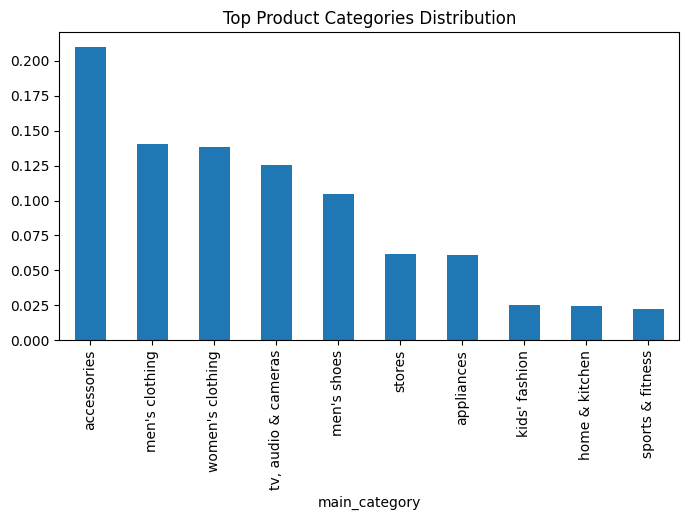

In [60]:
data["main_category"].value_counts(normalize=True).head(10).plot(
    kind="bar",
    figsize=(8,4),
    title="Top Product Categories Distribution"
)


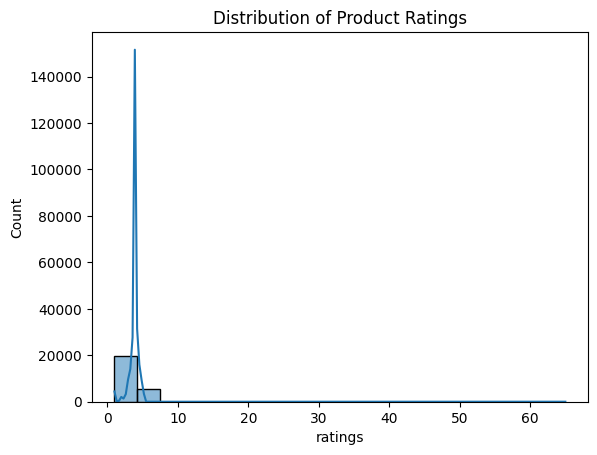

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["ratings"], bins=20, kde=True)
plt.title("Distribution of Product Ratings")
plt.show()


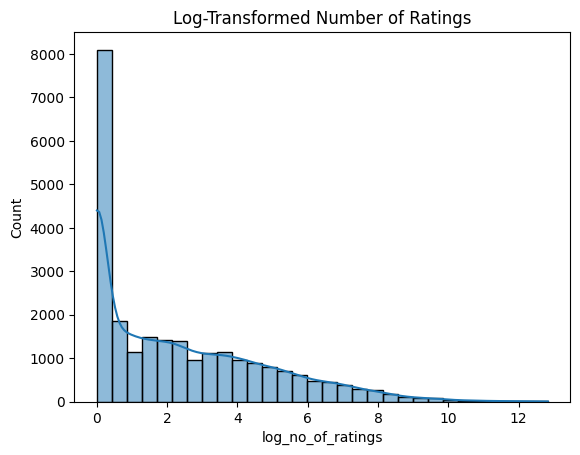

In [62]:
import numpy as np

data["log_no_of_ratings"] = np.log1p(data["no_of_ratings"])

sns.histplot(data["log_no_of_ratings"], bins=30, kde=True)
plt.title("Log-Transformed Number of Ratings")
plt.show()


In [66]:
top_products = (
    data[["main_category", "name", "no_of_ratings"]]
    .sort_values("no_of_ratings", ascending=False)
    .groupby("main_category")
    .head(1)
    .reset_index(drop=True)
)


In [67]:
top_products["Category_Product"] = (
    top_products["main_category"] + " | " + top_products["name"]
)


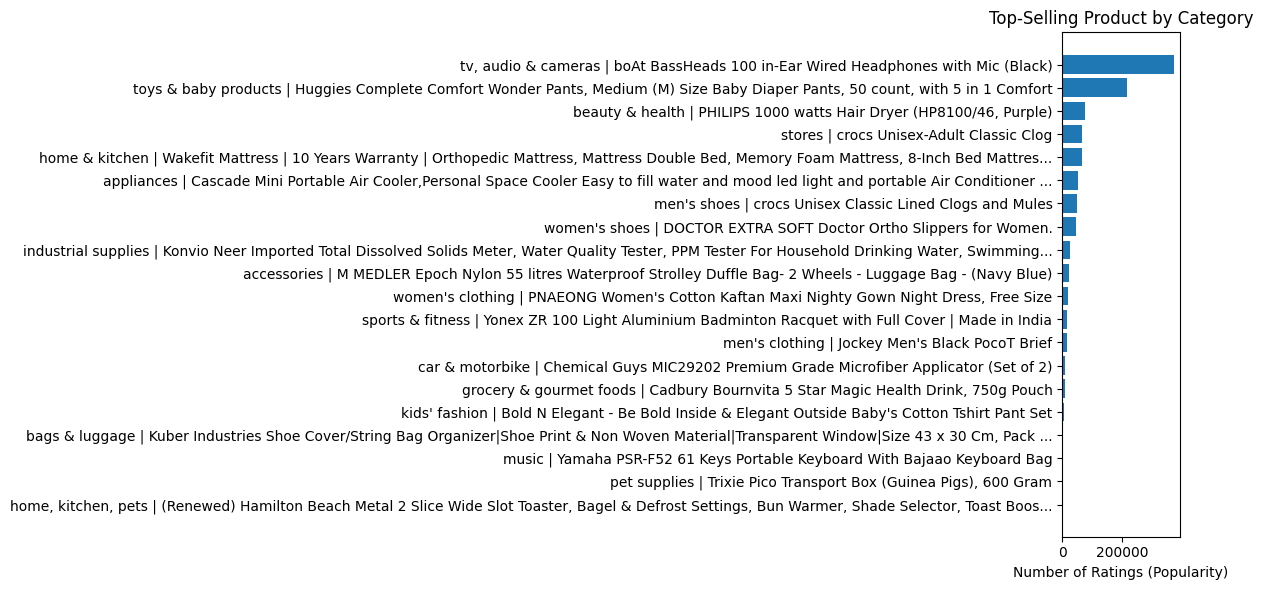

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.barh(
    top_products["Category_Product"],
    top_products["no_of_ratings"]
)

plt.xlabel("Number of Ratings (Popularity)")
plt.title("Top-Selling Product by Category")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Total Popularity (No. of Ratings) by Category'}, xlabel='main_category'>

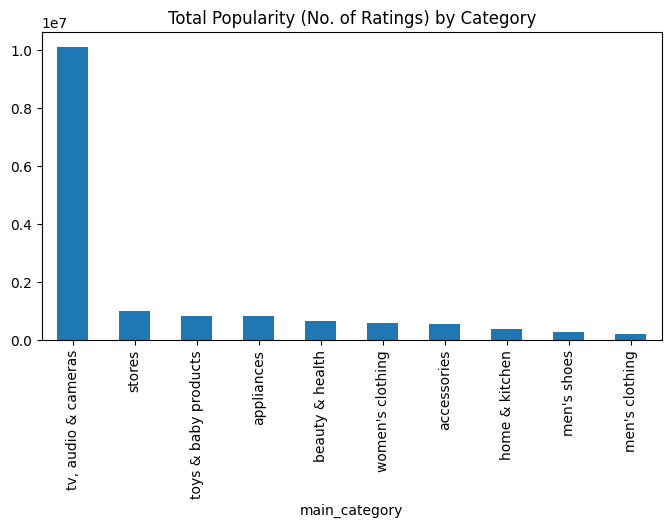

In [69]:
category_popularity = (
    data.groupby("main_category")["no_of_ratings"]
    .sum()
    .sort_values(ascending=False)
)

category_popularity.head(10).plot(
    kind="bar",
    figsize=(8,4),
    title="Total Popularity (No. of Ratings) by Category"
)


<Axes: title={'center': 'Popularity Concentration (Top 100 Products)'}, ylabel='Frequency'>

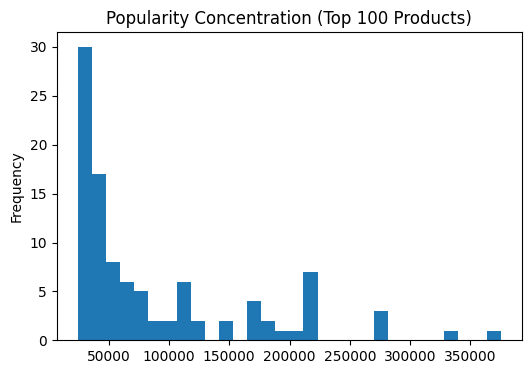

In [70]:
top_products = (
    data.sort_values("no_of_ratings", ascending=False)
    .head(100)
)

top_products["no_of_ratings"].plot(
    kind="hist",
    bins=30,
    figsize=(6,4),
    title="Popularity Concentration (Top 100 Products)"
)


In [73]:
data["price_difference"] = data["actual_price"] - data["discount_price"]


In [74]:
data["discount_percent"] = (
    data["price_difference"] / data["actual_price"]
) * 100


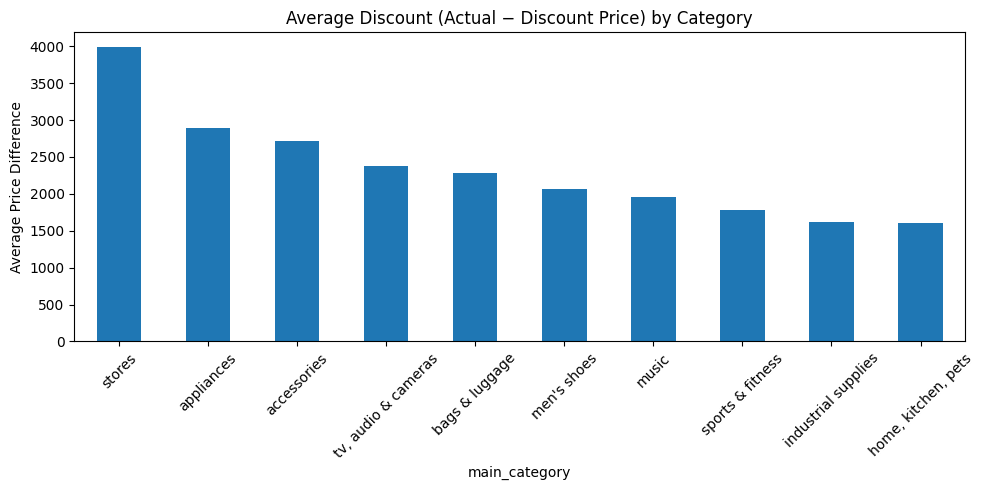

In [75]:
import matplotlib.pyplot as plt

category_discount = (
    data.groupby("main_category")["price_difference"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
category_discount.head(10).plot(kind="bar")
plt.ylabel("Average Price Difference")
plt.title("Average Discount (Actual − Discount Price) by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


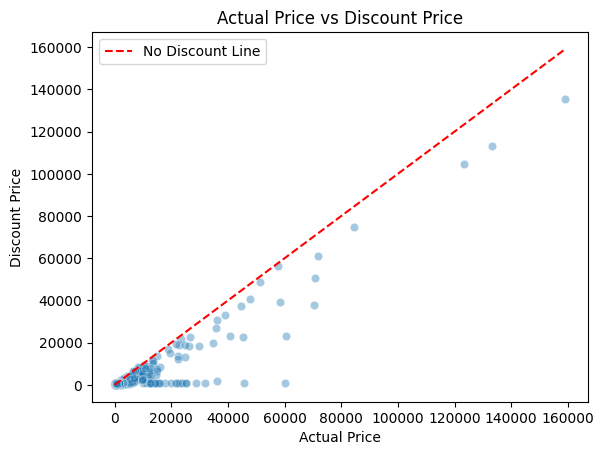

In [76]:
import seaborn as sns

sample_prices = data.sample(1000, random_state=42)

sns.scatterplot(
    x=sample_prices["actual_price"],
    y=sample_prices["discount_price"],
    alpha=0.4
)

plt.plot(
    [0, sample_prices["actual_price"].max()],
    [0, sample_prices["actual_price"].max()],
    color="red",
    linestyle="--",
    label="No Discount Line"
)

plt.xlabel("Actual Price")
plt.ylabel("Discount Price")
plt.title("Actual Price vs Discount Price")
plt.legend()
plt.show()


In [79]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Define rating scale
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise format
surprise_data = Dataset.load_from_df(
    data[['UserId', 'ProductId', 'ratings']],
    reader
)

# Train-test split
trainset, testset = train_test_split(
    surprise_data,
    test_size=0.2,
    random_state=42
)

print("Train size:", trainset.n_ratings)
print("Test size:", len(testset))

ModuleNotFoundError: No module named 'surprise'